In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

# Vérification et nettoyage préalable des tables

TABLE ERP - "stock"

In [2]:
#Vérification de la table ERP/stock
stock = pd.read_csv ('erp.csv', sep=';')
stock.info()
stock.isna().sum()
print(stock.shape)
stock.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB
(825, 5)


,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [5]:
#Vérification des doublons
print("Il y a", stock.duplicated(['product_id']).sum(), "doublon(s).")

Il y a 0 doublon(s).


TABLE LIAISON - "liaison"

In [6]:
#Vérification de la table liaison
liaison = pd.read_csv ('liaison.csv', sep=';')
print(liaison.shape)
print("")
liaison.info()
liaison.head()
liaison.isna().sum()

(825, 2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


product_id     0
id_web        91
dtype: int64

In [7]:
#Type de la table
print(type(liaison))

<class 'pandas.core.frame.DataFrame'>


In [8]:
#Unicité des clés primaires (uniques et non-nulles)
print("Il y a",liaison['product_id'].isnull().sum(),"valeur(s) nulle(s) pour la variable product_id.") 
print("Il y a",liaison['id_web'].isnull().sum(),"valeur(s) nulle(s) pour la variable id_web.")
print("")

#Vérification des doublons
print("Il y a", liaison.duplicated(['product_id']).sum(), "doublon(s) pour la variable product_id.")
print("Il y a", liaison.duplicated(['id_web']).sum(), "doublon(s) pour la variable id_web.")

Il y a 0 valeur(s) nulle(s) pour la variable product_id.
Il y a 91 valeur(s) nulle(s) pour la variable id_web.

Il y a 0 doublon(s) pour la variable product_id.
Il y a 90 doublon(s) pour la variable id_web.


TABLE WEB - "vente"

In [71]:
#Vérification de la table web/vente
vente = pd.read_csv ('web.csv', sep=';')
print(vente.shape)
print("")
vente.info()
vente.isna().sum()

(1513, 28)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id_web                 1428 non-null   object 
 1   virtual                1513 non-null   int64  
 2   downloadable           1513 non-null   int64  
 3   rating_count           1513 non-null   int64  
 4   average_rating         1430 non-null   float64
 5   total_sales            1430 non-null   float64
 6   tax_status             716 non-null    object 
 7   tax_class              0 non-null      float64
 8   post_author            1430 non-null   float64
 9   post_date              1430 non-null   object 
 10  post_date_gmt          1430 non-null   object 
 11  post_content           0 non-null      float64
 12  post_title             1430 non-null   object 
 13  post_excerpt           716 non-null    object 
 14  post_status            1430 non-null   objec

id_web                     85
virtual                     0
downloadable                0
rating_count                0
average_rating             83
total_sales                83
tax_status                797
tax_class                1513
post_author                83
post_date                  83
post_date_gmt              83
post_content             1513
post_title                 83
post_excerpt              797
post_status                83
comment_status             83
ping_status                83
post_password            1513
post_name                  83
post_modified              83
post_modified_gmt          83
post_content_filtered    1513
post_parent                83
guid                       83
menu_order                 83
post_type                  83
post_mime_type            799
comment_count              83
dtype: int64

In [10]:
vente.columns

Index(['id_web', 'virtual', 'downloadable', 'rating_count', 'average_rating',
       'total_sales', 'tax_status', 'tax_class', 'post_author', 'post_date',
       'post_date_gmt', 'post_content', 'post_title', 'post_excerpt',
       'post_status', 'comment_status', 'ping_status', 'post_password',
       'post_name', 'post_modified', 'post_modified_gmt',
       'post_content_filtered', 'post_parent', 'guid', 'menu_order',
       'post_type', 'post_mime_type', 'comment_count'],
      dtype='object')

In [11]:
# On observe les valeurs nulles détectées dans la colonne 'id_web'
recherche_null = vente[vente['id_web'].isnull()]

# On observe
print(recherche_null.shape)
print('')
recherche_null.info()
recherche_null.head()

(85, 28)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 178 to 796
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id_web                 0 non-null      object 
 1   virtual                85 non-null     int64  
 2   downloadable           85 non-null     int64  
 3   rating_count           85 non-null     int64  
 4   average_rating         2 non-null      float64
 5   total_sales            2 non-null      float64
 6   tax_status             2 non-null      object 
 7   tax_class              0 non-null      float64
 8   post_author            2 non-null      float64
 9   post_date              2 non-null      object 
 10  post_date_gmt          2 non-null      object 
 11  post_content           0 non-null      float64
 12  post_title             2 non-null      object 
 13  post_excerpt           2 non-null      object 
 14  post_status            2 non-null      object 


,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
178,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# On observe les lignes dont le post_name n'est pas nul
observation = recherche_null[recherche_null['post_name'].notnull()]

# On observe
print(observation.shape)
observation.head()

(2, 28)


,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
470,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-07-31 12:07:23,...,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
471,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-08-08 11:23:43,...,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [13]:
df_web_without_null = vente[vente['id_web'].notnull()]

# On observe
print(df_web_without_null.shape)
print('')
df_web_without_null.info()
df_web_without_null.head()

(1428, 28)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1428 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id_web                 1428 non-null   object 
 1   virtual                1428 non-null   int64  
 2   downloadable           1428 non-null   int64  
 3   rating_count           1428 non-null   int64  
 4   average_rating         1428 non-null   float64
 5   total_sales            1428 non-null   float64
 6   tax_status             714 non-null    object 
 7   tax_class              0 non-null      float64
 8   post_author            1428 non-null   float64
 9   post_date              1428 non-null   object 
 10  post_date_gmt          1428 non-null   object 
 11  post_content           0 non-null      float64
 12  post_title             1428 non-null   object 
 13  post_excerpt           714 non-null    object 
 14  post_status            1428 non-null   objec

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [14]:
# On ne conserve que les "product"
df_product = df_web_without_null[df_web_without_null['post_type']=='product']

# On observe
print(df_product.shape)
df_product.head()

(714, 28)


,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [16]:
df_product.columns

Index(['id_web', 'virtual', 'downloadable', 'rating_count', 'average_rating',
       'total_sales', 'tax_status', 'tax_class', 'post_author', 'post_date',
       'post_date_gmt', 'post_content', 'post_title', 'post_excerpt',
       'post_status', 'comment_status', 'ping_status', 'post_password',
       'post_name', 'post_modified', 'post_modified_gmt',
       'post_content_filtered', 'post_parent', 'guid', 'menu_order',
       'post_type', 'post_mime_type', 'comment_count'],
      dtype='object')

# Rapprochement des exports

In [15]:
# Jointure stock et liaison
erp_web = stock.merge(liaison, on='product_id', how='outer')
print(erp_web.shape)
erp_web.head()

(825, 6)


,product_id,onsale_web,price,stock_quantity,stock_status,id_web
0,3847,1,24.2,0,outofstock,15298
1,3849,1,34.3,0,outofstock,15296
2,3850,1,20.8,0,outofstock,15300
3,4032,1,14.1,0,outofstock,19814
4,4039,1,46.0,0,outofstock,19815


In [17]:
#Jointure vente et erp_web (Table finale)
print(df_product.shape)
df_product.head()

(714, 28)


,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [18]:
# On effectue une jointure "outer" entre erp_web et df_product
df_final = erp_web.merge(df_product, left_on='id_web', right_on='id_web', how='outer')

# On observe
print(df_final.shape)
df_final.head()

(825, 33)


,product_id,onsale_web,price,stock_quantity,stock_status,id_web,virtual,downloadable,rating_count,average_rating,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,3847,1,24.2,0,outofstock,15298,0.0,0.0,0.0,0.0,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,3849,1,34.3,0,outofstock,15296,0.0,0.0,0.0,0.0,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,3850,1,20.8,0,outofstock,15300,0.0,0.0,0.0,0.0,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,4032,1,14.1,0,outofstock,19814,0.0,0.0,0.0,0.0,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,4039,1,46.0,0,outofstock,19815,0.0,0.0,0.0,0.0,...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [19]:
#Suppression des doublons 
data_bottle_final = df_final.drop_duplicates(subset=['id_web'], inplace = False)
print(data_bottle_final.shape)
data_bottle_final.head(5)

(735, 33)


,product_id,onsale_web,price,stock_quantity,stock_status,id_web,virtual,downloadable,rating_count,average_rating,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,3847,1,24.2,0,outofstock,15298,0.0,0.0,0.0,0.0,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,3849,1,34.3,0,outofstock,15296,0.0,0.0,0.0,0.0,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,3850,1,20.8,0,outofstock,15300,0.0,0.0,0.0,0.0,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,4032,1,14.1,0,outofstock,19814,0.0,0.0,0.0,0.0,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,4039,1,46.0,0,outofstock,19815,0.0,0.0,0.0,0.0,...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


# Chiffre d’affaires par produit, ainsi que le total du chiffre d’affaires réalisé en ligne

In [43]:
#Chiffre d'affaires par produit
data_bottle_final['ca_produit'] = data_bottle_final['price']*data_bottle_final['total_sales']
print(data_bottle_final.groupby('post_title')[['price','total_sales','ca_produit']].mean())

                                                    price  total_sales  \
post_title                                                               
Agnès Levet Côte Rôtie Améthyste 2017                41.2          4.0   
Agnès Levet Côte Rôtie Maestria 2017                 55.0          3.0   
Agnès Levet Côte Rôtie Péroline 2017                 57.0          3.0   
Alain Graillot Crozes-Hermitage Blanc 2018           24.4         10.0   
Alain Graillot Crozes-Hermitage Rouge 2017           24.4          6.0   
...                                                   ...          ...   
Zind-Humbrecht Pinot Gris Roche Calcaire 2017        23.0          0.0   
Zind-Humbrecht Riesling Clos Windsbuhl 2014          69.0          0.0   
Zind-Humbrecht Riesling Grand Cru Rangen De Tha...  100.0          0.0   
Zind-Humbrecht Riesling Herrenweg de Turckheim ...   31.7          2.0   
Zind-Humbrecht Zind 2017                             25.7          6.0   

                                     

/var/folders/gp/y1r_c8817xz9052n5c2hvkmw0000gn/T/ipykernel_2951/2217283518.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bottle_final['ca_produit'] = data_bottle_final['price']*data_bottle_final['total_sales']


In [21]:
#Chiffre d'affaires total réalisé en ligne
print("Le CA total réalisé en ligne est de",data_bottle_final['ca_produit'].sum(), "€.")

Le CA total réalisé en ligne est de 70568.6 €.


## Détection de valeurs aberrantes

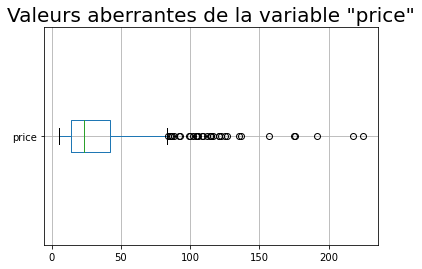

In [22]:
#Représentation graphique des valeurs aberrantes de prix (outliers)
data_bottle_final.boxplot(column="price", vert=False)
plt.title('Valeurs aberrantes de la variable "price"', fontsize=20)
plt.show()

In [23]:
#Liste des valeurs aberrantes (première méthode)
data_bottle_final.sort_values(["price"], ascending=False).head(5)

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,virtual,downloadable,rating_count,average_rating,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,ca_produit
291,4352,1,225.0,0,outofstock,15940,0.0,0.0,0.0,0.0,...,2020-03-07 11:18:45,2020-03-07 10:18:45,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1125.0
525,5001,1,217.5,20,instock,14581,0.0,0.0,0.0,0.0,...,2020-05-16 09:00:05,2020-05-16 07:00:05,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
692,5892,1,191.3,10,instock,14983,0.0,0.0,0.0,0.0,...,2020-04-01 09:30:09,2020-04-01 07:30:09,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,573.9
310,4402,1,176.0,8,instock,3510,0.0,0.0,0.0,0.0,...,2020-08-22 11:35:03,2020-08-22 09:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,2288.0
657,5767,1,175.0,12,instock,15185,0.0,0.0,0.0,0.0,...,2020-06-11 15:25:04,2020-06-11 13:25:04,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0


In [24]:
#Liste des valeurs aberrantes (deuxième méthode)
article_prix = data_bottle_final.groupby('post_title')[['price','product_id','total_sales','post_title']].mean()
article_prix.sort_values(["price"], ascending=False).head(5)

#Cette liste permet de vérifier les plus grosses valeurs aberrantes et de constater 
# si elles sont cohérentes ou non.

,price,product_id,total_sales
post_title,,,
Champagne Egly-Ouriet Grand Cru Millésimé 2008,225.0,4352.0,5.0
David Duband Charmes-Chambertin Grand Cru 2014,217.5,5001.0,0.0
Coteaux Champenois Egly-Ouriet Ambonnay Rouge 2016,191.3,5892.0,3.0
Cognac Frapin VIP XO,176.0,4402.0,13.0
Camille Giroud Clos de Vougeot 2016,175.0,5767.0,0.0


# Calcul de l'écart inter-quartile

In [46]:
#Continuons l'investigation avec des méthodes plus précises

#Première méthode
def find_iqr(iqr):
  return np.subtract(*np.percentile(iqr, [75, 25]))
data_bottle_final[['price']].apply(find_iqr)

price    27.8
dtype: float64

In [47]:
#Deuxième méthode sans fonction
Q1 = np.percentile(data_bottle_final[['price']], 25)
Q3 = np.percentile(data_bottle_final[['price']], 75)
IQR = (Q3-Q1)
print("Le premier quartile est de :", Q1)
print("Le troisième quartile est de :", Q3)
print("L'écart inter-quartile est de :",Q3 - Q1)

# Calcul du seuil (Q3+(1,5*(Q3-Q1)))
IQR_seuil = Q3+(IQR*1.5)
print("Le seuil fixé (ou Upper bound) est à :",IQR_seuil)

Le premier quartile est de : 14.1
Le troisième quartile est de : 41.9
L'écart inter-quartile est de : 27.799999999999997
Le seuil fixé (ou Upper bound) est à : 83.6


In [48]:
# On calcule les valeurs limites
lower_bound = Q1 -(1.5 * IQR)
upper_bound = IQR_seuil
print("Lower_bound => " + str(lower_bound))
print("Upper_bound => " + str(upper_bound))

Lower_bound => -27.599999999999994
Upper_bound => 83.6


In [38]:
#Recherche des outliers et création de deux tables distinctes (AVEC et SANS outliers)
outliers = data_bottle_final.loc[df_final['price']>= upper_bound, ['product_id','price','total_sales']]
no_outliers = data_bottle_final.loc[df_final['price']<= upper_bound, ['product_id','price','total_sales']]

#Nombre d'outliers détectés
print("Le nombre d'outliers détectés est de :",str(len(outliers['product_id'])))
print("Le nombre de valeurs normales détectées est de :",str(len(no_outliers['product_id'])))

Le nombre d'outliers détectés est de : 34
Le nombre de valeurs normales détectées est de : 701


In [70]:
# On écrit une fonction qui va lister les prix considérés comme outliers
price = data_bottle_final['price']
outliers=[]
def detectOutlier(data_bottle_final):
    threshold=1.86
    mean = np.mean(data_bottle_final)
    std =np.std(data_bottle_final)
    
    for i in data_bottle_final:
        z_score = (i - mean)/std
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

# On observe la liste finale
priceOutliers = detectOutlier(price)
print("Nombre d'outliers détectés => " + str(len(priceOutliers)))
print(priceOutliers)

Nombre d'outliers détectés => 34
[86.1, 100.0, 88.4, 225.0, 126.5, 85.6, 176.0, 108.5, 157.0, 104.0, 109.6, 102.3, 137.0, 217.5, 105.0, 105.0, 112.0, 86.8, 92.0, 83.7, 124.8, 175.0, 191.3, 93.0, 122.0, 114.0, 135.0, 105.6, 116.4, 115.0, 121.0, 99.0, 115.0, 121.0]


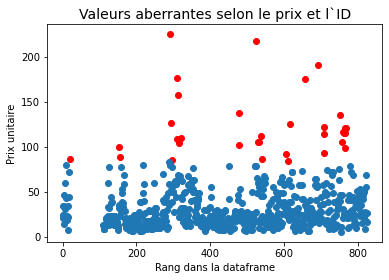

In [45]:
# On reprends nos 2 DataFrames distincts pour séparer les couleurs

# On plot
plt.scatter(outliers['price'].index, outliers['price'].values,c='red')
plt.scatter(no_outliers['price'].index, no_outliers['price'].values)
plt.xlabel('Rang dans la dataframe', fontsize = 10)
plt.ylabel('Prix unitaire', fontsize = 10)
plt.title('Valeurs aberrantes selon le prix et l`ID', fontsize = 14)
plt.show()

Text(0.5, 1.0, 'Valeurs aberrantes selon le nombre de ventes')

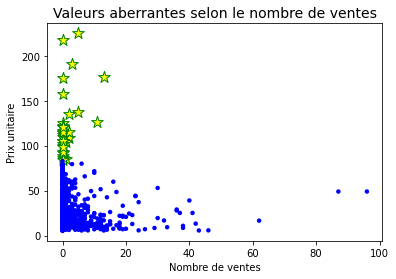

In [42]:
plt.scatter(outliers['total_sales'], outliers['price'], s = 150, c = 'yellow', marker = '*', edgecolors = 'green')
plt.scatter(no_outliers['total_sales'],no_outliers['price'], s = 20, c = 'blue', marker = 'o', edgecolors = 'none')
plt.xlabel('Nombre de ventes', fontsize = 10)
plt.ylabel('Prix unitaire', fontsize = 10)
plt.title('Valeurs aberrantes selon le nombre de ventes', fontsize = 14)